# Python notebook to analyze the log files from the model in LabView

In [44]:
from nptdms import TdmsFile as td
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '20'
plt.rcParams['font.weight'] = '100'

In [8]:
tdms_file = td("C:/Users/ruben/Documents/biCNNprediction/Results/Logs/DataLog_2123572011.tdms")

vstim = tdms_file.object("Variables","vstim").data
rslip = tdms_file.object("Variables","rslip").data
eyevel = tdms_file.object("Variables","eyevel").data
vcn = tdms_file.object("Variables","vcn").data

time = np.linspace(0,len(eyevel)*0.1,len(eyevel))



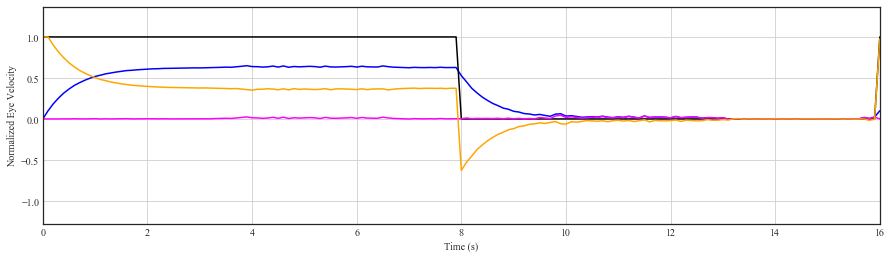

In [23]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(time, eyevel, color='blue')
ax.plot(time, vstim, color='black')
ax.plot(time, vcn,color='magenta')
ax.plot(time, rslip,color='orange')
ax.set(xlabel='Time (s)', ylabel='Normalized Eye Velocity')
ax.grid()
ax.set_xlim([0, 16])
# ax.set_ylim([-0.2, 1.1])
plt.savefig("start.svg")
plt.show()

In [37]:
rse = []
window = 160 
cycles = int(np.floor(len(eyevel)/window))
print('Number of cycles {}'.format(cycles))

for i in range(cycles):
    rse.append( np.sqrt(np.sum(rslip[i*window:(i+1)*window]**2))/window )
    

Number of cycles 3797


[Text(0,0.5,'RSE'), Text(0.5,0,'Cycle No.')]

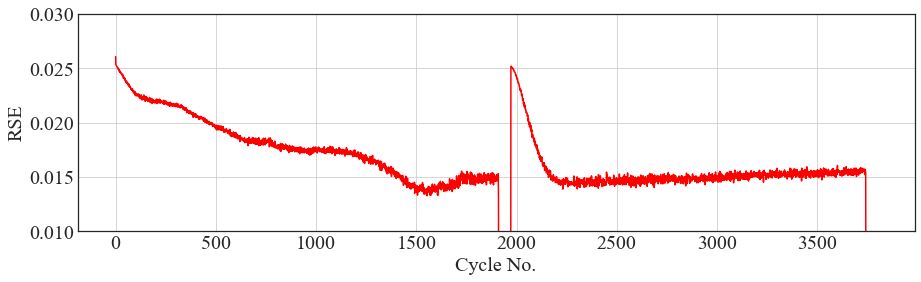

In [46]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(rse, color='red')
ax.grid()
ax.set_ylim([0.01, 0.03])
ax.set(xlabel='Cycle No.', ylabel='RSE')
